In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from itertools import combinations


%matplotlib inline

plt.style.use('ggplot')

In [2]:
df_import = pd.read_csv('Provider_Info.csv')
df_import.head()

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Provider County Name,Ownership Type,...,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,015019,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,P O BOX 130,ELMORE,AL,36025,3345678484,250,Elmore,For profit - Corporation,...,16,291.667,1,2,1,78677.0,0,1,130 ELMORE AL 36025,08/01/2019
1,015075,SUMMERFORD NURSING HOME INC,4087 HIGHWAY 31 SOUTHWEST,FALKVILLE,AL,35622,2567845275,510,Morgan,For profit - Corporation,...,401,72.167,0,1,1,13408.0,0,1,"4087 HIGHWAY FALKVILLE, AL 35622",08/01/2019
2,015124,CLAY COUNTY NURSING HOME,83825 HIGHWAY 9 P O BOX 1270,ASHLAND,AL,36251,2563542131,130,Clay,Non profit - Other,...,20,20.667,0,0,0,0.0,0,0,"83825 HIGHWAY ASHLAND, AL 36251",08/01/2019
3,015138,HENDRIX HEALTH AND REHABILITATION,1000 HIGHWAY 33,DOUBLE SPRINGS,AL,35553,2054892136,660,Winston,For profit - Corporation,...,44,18.667,0,0,0,0.0,0,0,"1000 HIGHWAY DOUBLE SPRINGS, AL 35553",08/01/2019
4,015142,"LINEVILLE HEALTH AND REHABILITATION, LLC",88073 HIGHWAY 9,LINEVILLE,AL,36266,2563962104,130,Clay,For profit - Corporation,...,24,14.000,0,0,0,0.0,0,0,"88073 HIGHWAY LINEVILLE, AL 36266",08/01/2019


### About the Dataset

In [3]:
#When data was processed/published
print('Published {}'.format(df_import['Processing Date'].unique()))

#Amount of features in the dataset
row_count = len(df_import.axes[0])
col_count = len(df_import.axes[1])
print('{} entries'.format(row_count))
print('{} features'. format(col_count))

Published ['08/01/2019']
15512 entries
85 features


In [4]:
df_import.info()
#Know there are nulls, make sure to look at later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15512 entries, 0 to 15511
Data columns (total 85 columns):
Federal Provider Number                                            15512 non-null object
Provider Name                                                      15512 non-null object
Provider Address                                                   15512 non-null object
Provider City                                                      15512 non-null object
Provider State                                                     15512 non-null object
Provider Zip Code                                                  15512 non-null int64
Provider Phone Number                                              15512 non-null int64
Provider SSA County Code                                           15512 non-null int64
Provider County Name                                               15512 non-null object
Ownership Type                                                     15512 non-null object
Numb

In [5]:
def col_names(df):
    keys = []
    for idx, column in enumerate(list(df.columns)):
        keys.append(column)
        print (column)

#col_names(df_import)


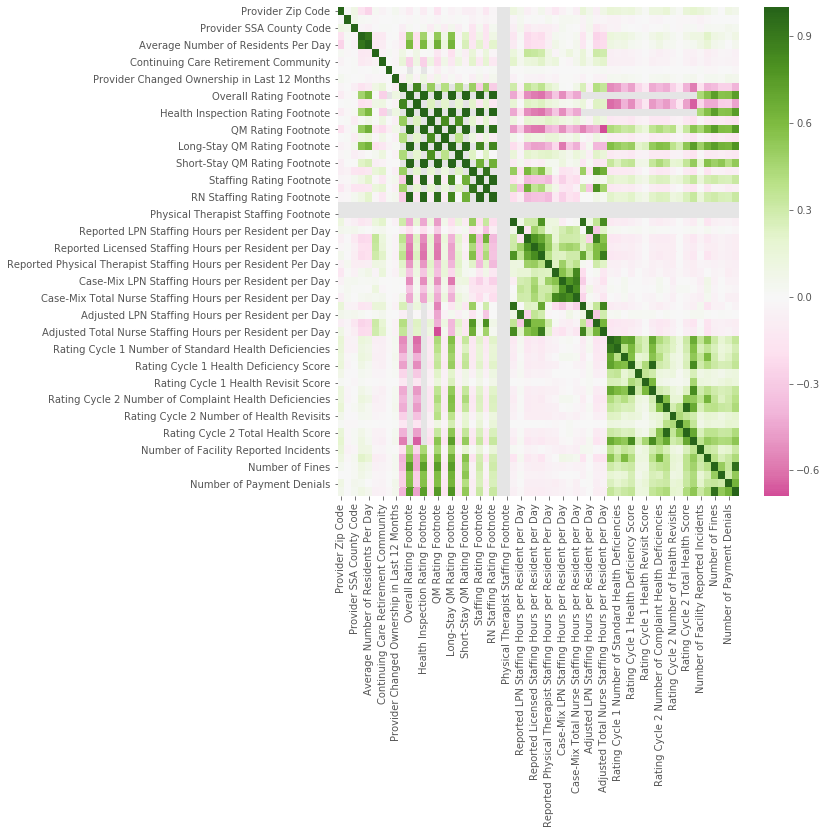

In [6]:
def heatmap(df, fig_size):
    plt.figure(figsize=fig_size)
    sns.heatmap(df.corr(), cmap="PiYG", annot=False, center=0);

heatmap(df_import, (9,9))

### Conclusion about database contents

Most data to analyze is based on three factors: 

1. Quality Management
2. Health Inspection
3. Staffing

Break data down by factors by creating databases based just on those factors.
    

### QM Ratings Breakdown

In [7]:
#Create a new database with only QM ratings
def new_database(df, columns):
    return df_import.loc[:, columns]

QM_cols = [i for i in list(df_import.columns) if 'QM' in i]
QM_df = new_database(df_import, QM_cols)
QM_df.head()

,QM Rating,QM Rating Footnote,Long-Stay QM Rating,Long-Stay QM Rating Footnote,Short-Stay QM Rating,Short-Stay QM Rating Footnote
0,1.0,NaN,1.0,NaN,1.0,NaN
1,3.0,NaN,2.0,NaN,4.0,NaN
2,5.0,NaN,5.0,NaN,NaN,2.0
3,4.0,NaN,4.0,NaN,4.0,NaN
4,4.0,NaN,3.0,NaN,4.0,NaN


/home/lea/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lea/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


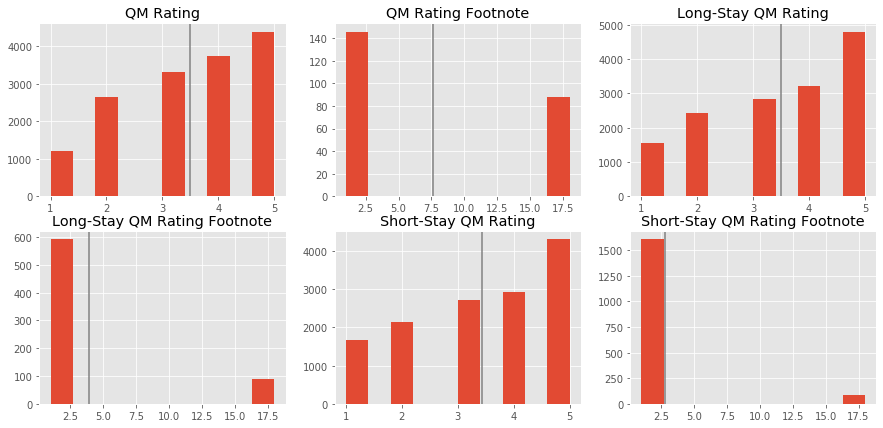

In [8]:
def distributions(plot_size, fig_size, df, columns):
    fig, axs = plt.subplots(plot_size[0], plot_size[1], figsize=fig_size)
    keys = []
    for i in range(plot_size[0]):
        for j in range(plot_size[1]):
            keys.append((i,j))

    for idx, column in zip(keys,columns):
        cols = df[column]
        axs[idx[0]][idx[1]].set_title(column)
        axs[idx[0]][idx[1]].hist(cols)
        axs[idx[0]][idx[1]].axvline(np.mean(cols), color='grey')
        
distributions((2,3), (15,7), QM_df, QM_cols)

In [9]:
#Create a new database with only important QM features

QM_df = df_import.loc[:, ['Provider Name', 'QM Rating']]
QM_df.head(5)

,Provider Name,QM Rating
0,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,1.0
1,SUMMERFORD NURSING HOME INC,3.0
2,CLAY COUNTY NURSING HOME,5.0
3,HENDRIX HEALTH AND REHABILITATION,4.0
4,"LINEVILLE HEALTH AND REHABILITATION, LLC",4.0


### Staffing Breakdown

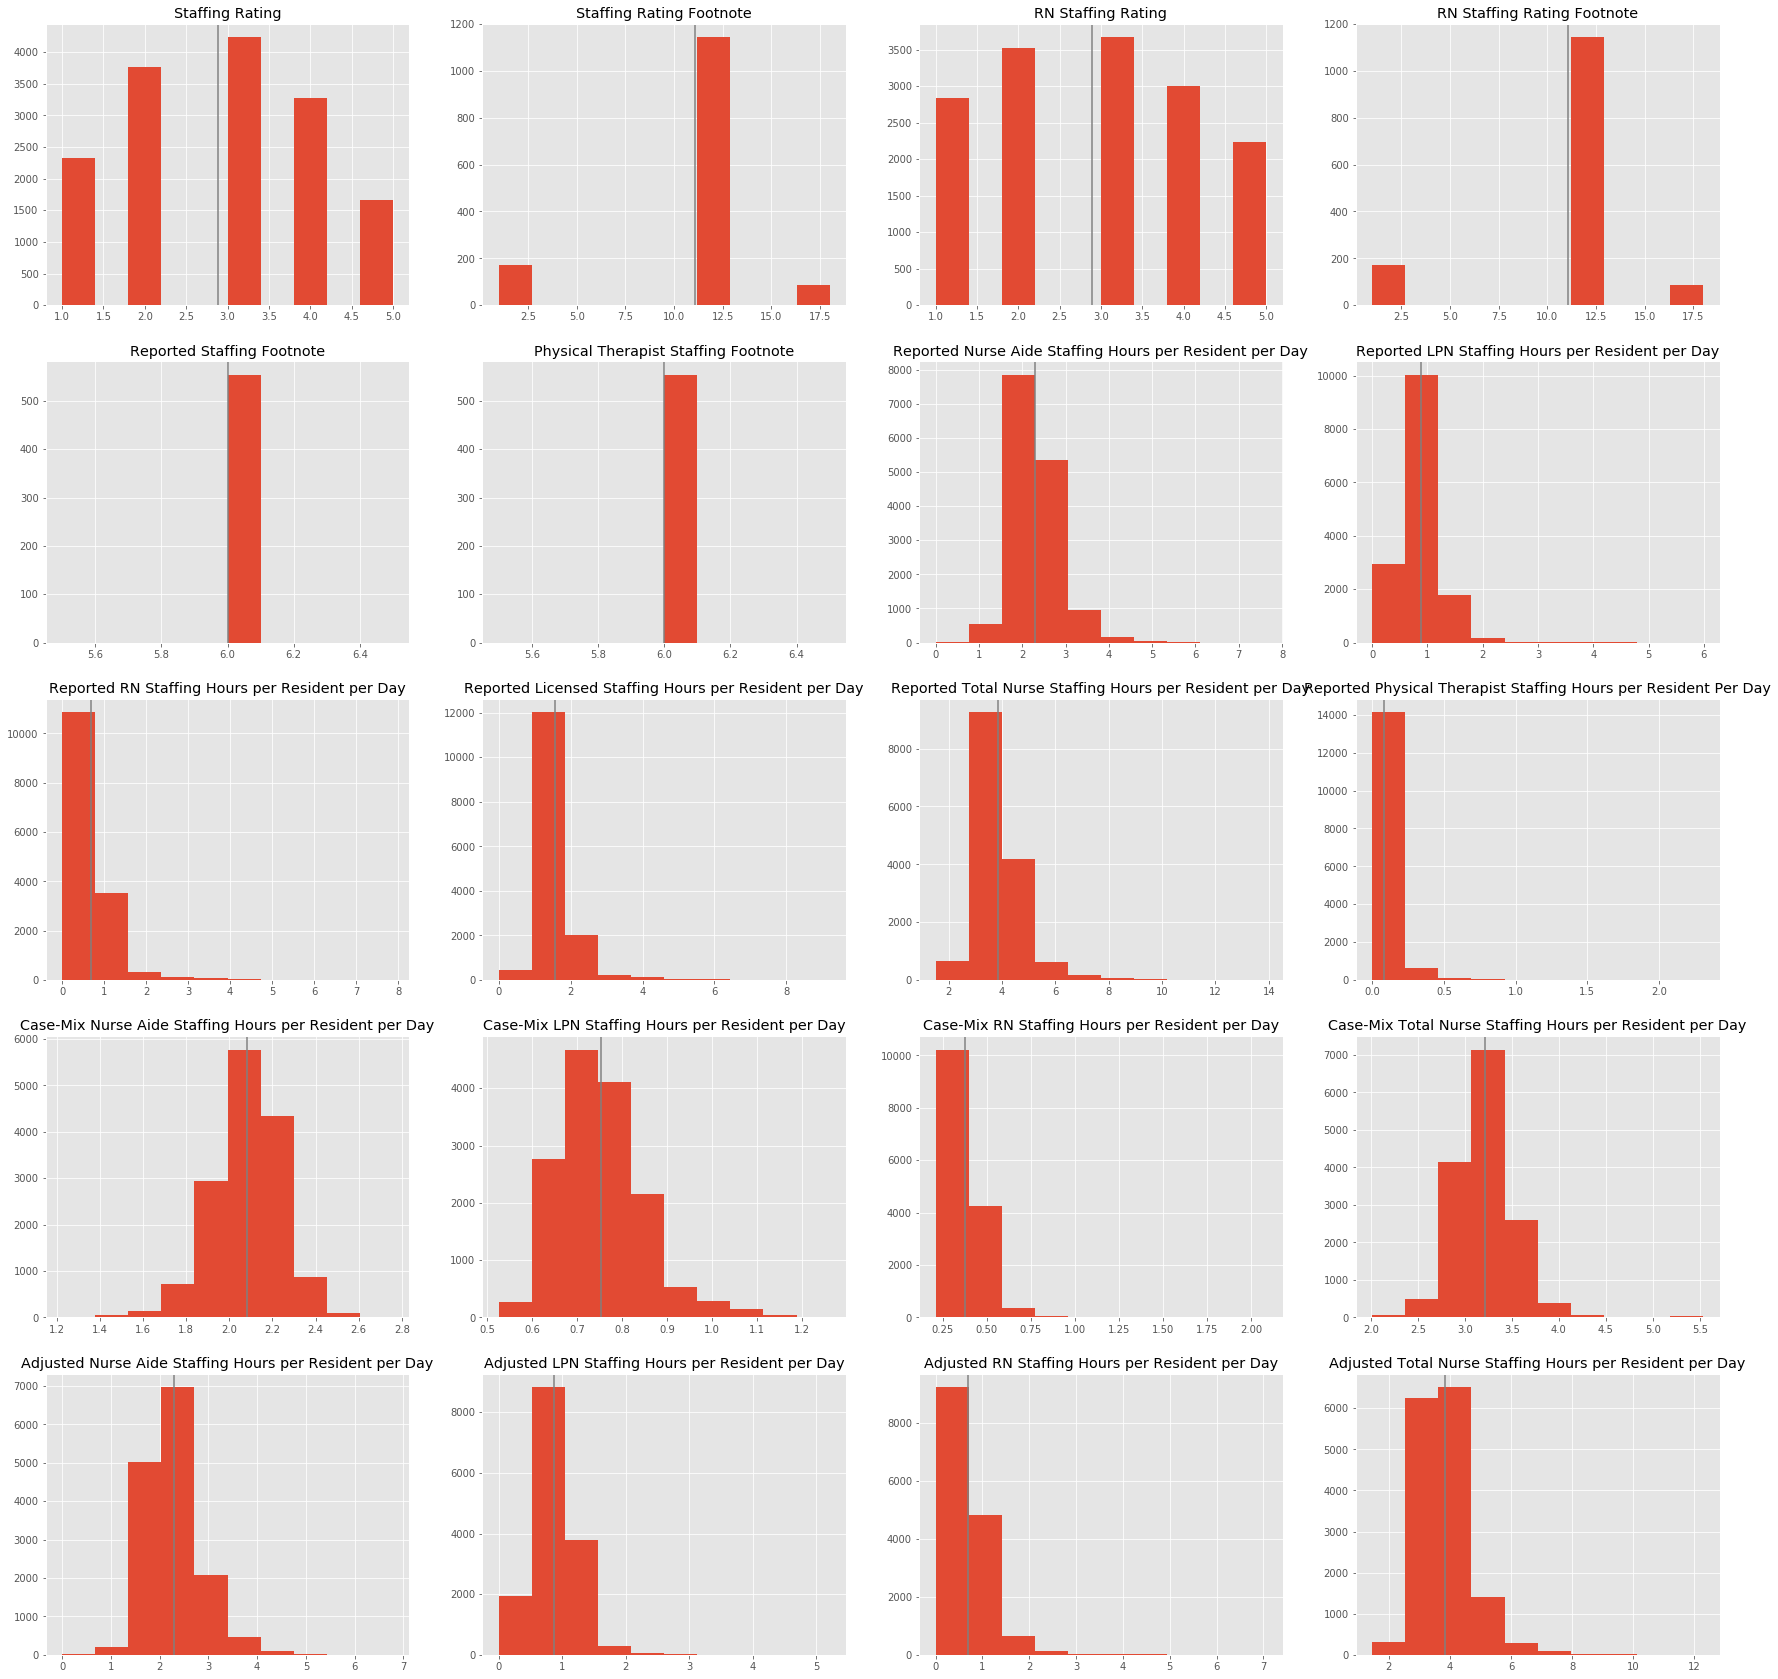

In [10]:
staffing_cols = [i for i in list(df_import.columns) if 'Staffing' in i]
staffing_df = new_database(df_import, staffing_cols)       
distributions((5,4), (30,30), staffing_df, staffing_cols)

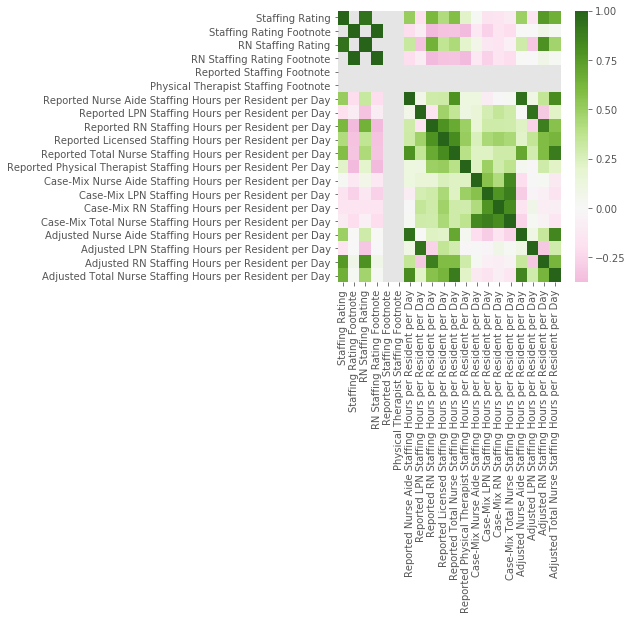

In [11]:
heatmap(staffing_df, (5,5))

In [12]:
#Create a new database with only important staffing features

staffing_df = df_import.loc[:, ['Provider Name', 'Staffing Rating','Adjusted Total Nurse Staffing Hours per Resident per Day']]

staffing_df.head(5)

,Provider Name,Staffing Rating,Adjusted Total Nurse Staffing Hours per Resident per Day
0,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,3.0,3.51011
1,SUMMERFORD NURSING HOME INC,3.0,3.43516
2,CLAY COUNTY NURSING HOME,NaN,NaN
3,HENDRIX HEALTH AND REHABILITATION,2.0,3.26946
4,"LINEVILLE HEALTH AND REHABILITATION, LLC",3.0,4.18192


### Health Inspection Breakdown 

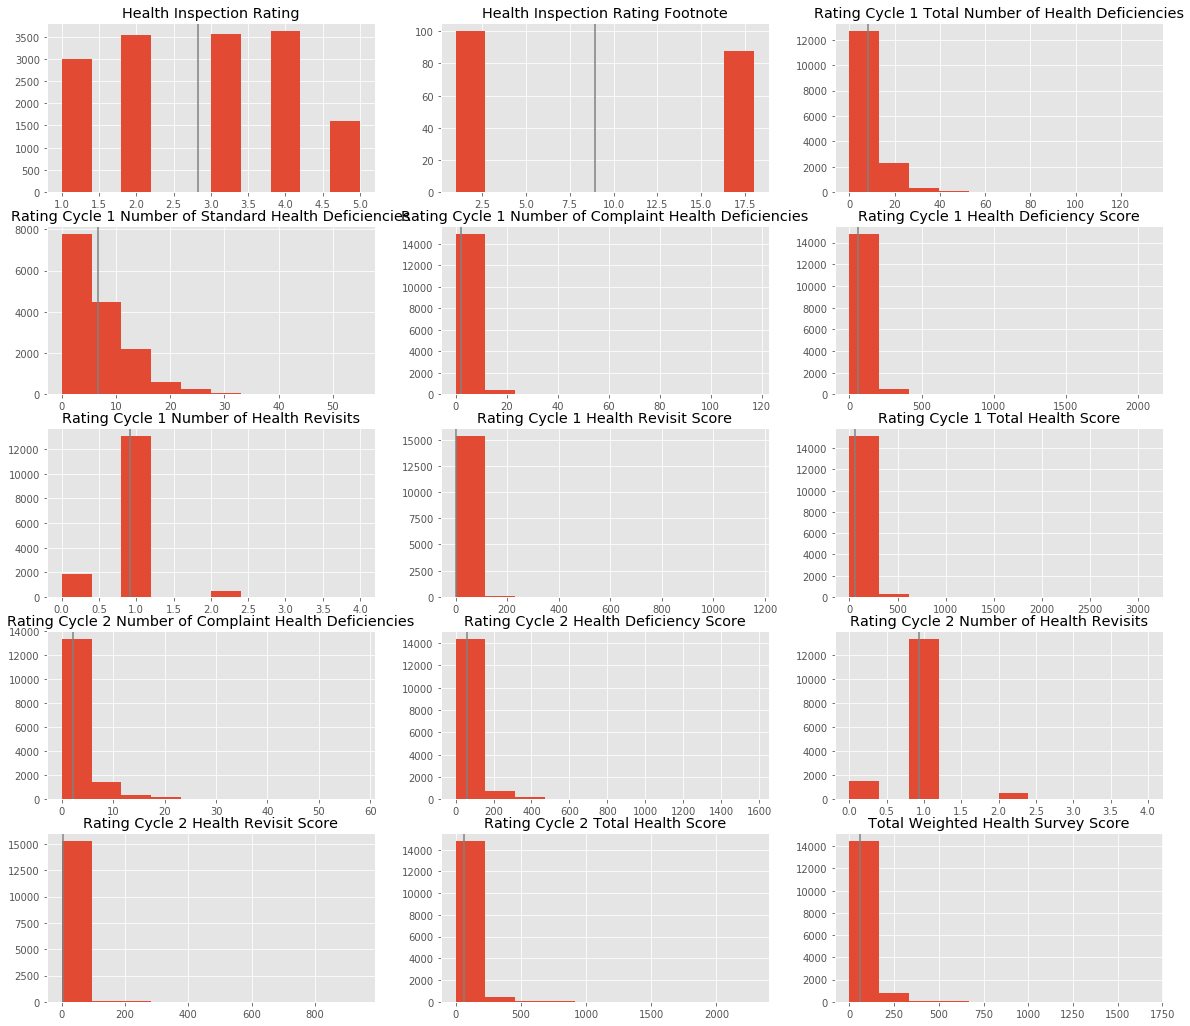

In [13]:
#Create a new database with only health inspection features

inspection_cols = [i for i in list(df_import) if 'Health' in i]
#print(inspection_cols)
inspection_df = new_database(df_import, inspection_cols)
inspection_replace = inspection_df.applymap(lambda x: 0 if x=="." else x)
inspection_replace



inspection_replace.dtypes

#change data types
inspection_replace['Rating Cycle 2 Number of Standard Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 2 Number of Standard Health Deficiencies'])
inspection_replace['Rating Cycle 2 Total Number of Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 2 Total Number of Health Deficiencies'])
inspection_replace['Rating Cycle 3 Total Number of Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Total Number of Health Deficiencies'])
inspection_replace['Rating Cycle 3 Number of Standard Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Number of Standard Health Deficiencies'])
inspection_replace['Rating Cycle 3 Number of Health Revisits'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Number of Health Revisits'])
inspection_replace['Rating Cycle 3 Number of Complaint Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Number of Complaint Health Deficiencies'])
inspection_replace['Rating Cycle 3 Health Deficiency Score'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Health Deficiency Score'])
inspection_replace['Rating Cycle 3 Health Revisit Score'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Health Revisit Score'])
inspection_replace['Rating Cycle 3 Total Health Score'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Total Health Score'])

inspection_integer= inspection_replace.select_dtypes(include=['float64'])
inspection_cols2 = list(inspection_integer.columns)



distributions((5,3), (20,18), inspection_integer, inspection_cols2)


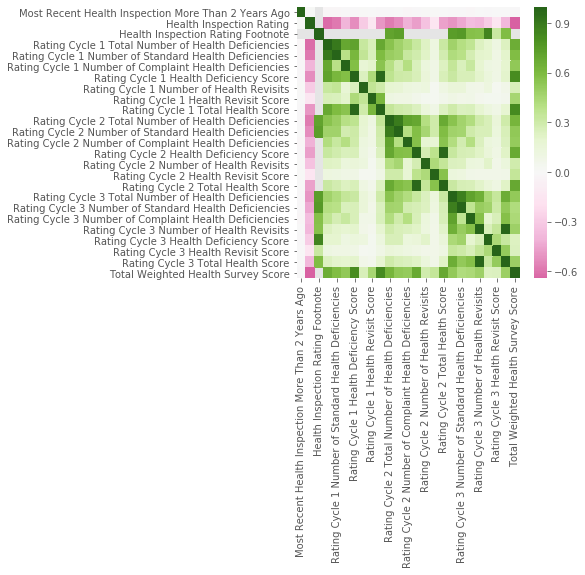

In [14]:
heatmap(inspection_replace, (5,5))

In [15]:
#Create a new database with only health inspection features

health_df = df_import.loc[:, ['Provider Name', 'Health Inspection Rating','Total Weighted Health Survey Score']]

health_df.head()


,Provider Name,Health Inspection Rating,Total Weighted Health Survey Score
0,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,1.0,291.667
1,SUMMERFORD NURSING HOME INC,1.0,72.167
2,CLAY COUNTY NURSING HOME,3.0,20.667
3,HENDRIX HEALTH AND REHABILITATION,3.0,18.667
4,"LINEVILLE HEALTH AND REHABILITATION, LLC",4.0,14.000


### Other Data

In [16]:
state_count = df_import.groupby(df_import['Provider State']).count()
state_count.head()

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Provider County Name,Ownership Type,Number of Certified Beds,...,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
Provider State,,,,,,,,,,,,,,,,,,,,,
AK,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
AL,228,228,228,228,228,228,228,228,228,228,...,228,227,228,228,228,228,228,228,228,228
AR,230,230,230,230,230,230,230,230,230,230,...,230,228,230,230,230,230,230,230,230,230
AZ,146,146,146,146,146,146,146,146,146,146,...,146,144,146,146,146,146,146,146,146,146
CA,1193,1193,1193,1193,1193,1193,1193,1193,1193,1193,...,1193,1190,1193,1193,1193,1193,1193,1193,1191,1193


In [17]:
ownership_type = df_import.groupby(df_import['Ownership Type']).count()['Federal Provider Number'].rename({'Federal Provider Number':'Type_Count'})
ownership_type.head()

Ownership Type
For profit - Corporation                  8517
For profit - Individual                    744
For profit - Limited Liability company     620
For profit - Partnership                   947
Government - City                           95
Name: Federal Provider Number, dtype: int64

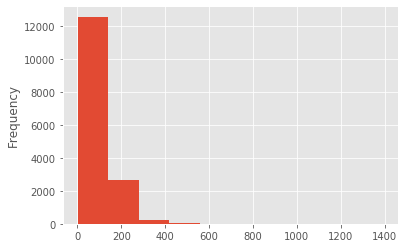

In [18]:
number_of_beds = df_import['Number of Certified Beds']
number_of_beds.plot.hist()

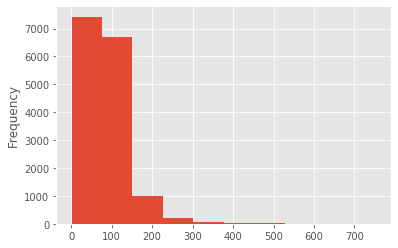

In [19]:
avg_residents_per_day = df_import['Average Number of Residents Per Day']
avg_residents_per_day.plot.hist()

In [20]:
resides_in_hospital = df_import.groupby(df_import['Provider Resides in Hospital'])['Provider Resides in Hospital'].count()
resides_in_hospital

Provider Resides in Hospital
False    14856
True       656
Name: Provider Resides in Hospital, dtype: int64

### Which Data Matters?

Create a dataset of the columns that I want to do analysis on and do analysis.


Cannot do analysis on Quality Measures- only categorical data
Cannot do analysis on Staffing - ratios have a small spread

Health Survey Scores seems to be the feature with best numerical data to do my analysis on. I can do analysis against the following grouped data.

- State
- Ownership Type
- Number of Certified Beds
- Average Number of Residents Per Day
- Provider Resides in Hospital


In [21]:
merged_df = df_import.loc[:, ['Provider Name', 'Provider State', 'Ownership Type', 
                              'Number of Certified Beds', 'Average Number of Residents Per Day',
                              'Provider Resides in Hospital',
                              'Total Weighted Health Survey Score']].dropna(axis=0)

#drop null values- Total 15,511 rows now

merged_df.head()

,Provider Name,Provider State,Ownership Type,Number of Certified Beds,Average Number of Residents Per Day,Provider Resides in Hospital,Total Weighted Health Survey Score
0,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,AL,For profit - Corporation,124,98.5,False,291.667
1,SUMMERFORD NURSING HOME INC,AL,For profit - Corporation,216,200.0,False,72.167
3,HENDRIX HEALTH AND REHABILITATION,AL,For profit - Corporation,110,104.5,False,18.667
4,"LINEVILLE HEALTH AND REHABILITATION, LLC",AL,For profit - Corporation,101,99.0,False,14.000
5,ALBERTVILLE NURSING HOME,AL,For profit - Corporation,159,152.4,False,14.000


## Hypothesis Testing

Since we will be using the Total Weighted Health Survey Score as our main data analysis, we need to check it's distribution. The distribution below is not normal, so we will need to use a u-test to calculate the p-value.

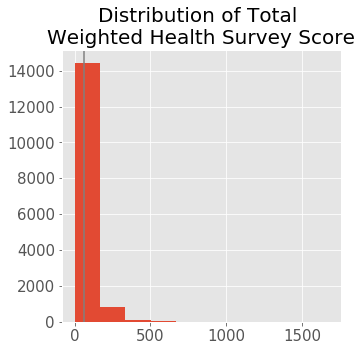

In [22]:
health = merged_df['Total Weighted Health Survey Score']
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(health)
ax.set_title('Distribution of Total \nWeighted Health Survey Score', fontsize=20)
ax.axvline(np.mean(merged_df['Total Weighted Health Survey Score']),color='grey')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)


fig.savefig('dist_total_weighted.png')

### Mean Health Survey Score vs Elderly Population per State

In [23]:
h0 = 'The percentage of elderly popuylation per state has no effect on the mean health survey score'
ha = 'The percentage of elderly population per state changes hte mean health survey score'
alpha = .05

In order to find this out, I had to import another data set. This set was taken from data.census.gov. 

In [24]:
census_import = pd.read_csv('state_census.csv')
census_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Columns: 418 entries, id to Unnamed: 417
dtypes: float64(400), object(18)
memory usage: 169.9+ KB


In [25]:
#census_columns = col_names(census_import)    

In [26]:
census_df = census_import[['Geographic Area Name',
                        '65 years and over!!Estimate!!SEX AND AGE!!Male',
                        'Total!!Estimate!!Total population']].rename(columns={
                        'Geographic Area Name': 'State', 
                        '65 years and over!!Estimate!!SEX AND AGE!!Male': 'Elderly Population', 
                        'Total!!Estimate!!Total population': 'Total Population'}).dropna()
census_df['Percentage of Elderly'] = census_df['Elderly Population']/census_df['Total Population']

census_df.head()

,State,Elderly Population,Total Population,Percentage of Elderly
0,Alabama,803216.0,4874747.0,0.164771
1,Alaska,83041.0,739795.0,0.112249
2,Arizona,1200850.0,7016270.0,0.171152
3,Arkansas,497024.0,3004279.0,0.165439
4,California,5504817.0,39536653.0,0.139233


In [27]:
us_state_abbrev = {'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


census_df['State'] = census_df['State'].apply(lambda x: us_state_abbrev[x])
census_df.head()

,State,Elderly Population,Total Population,Percentage of Elderly
0,AL,803216.0,4874747.0,0.164771
1,AK,83041.0,739795.0,0.112249
2,AZ,1200850.0,7016270.0,0.171152
3,AR,497024.0,3004279.0,0.165439
4,CA,5504817.0,39536653.0,0.139233


In [28]:
nursing_group = dict(merged_df.groupby('Provider State').mean()['Total Weighted Health Survey Score'])

census_df['Mean Health Survey Score']= census_df['State'].map(nursing_group)
census_df.head()

,State,Elderly Population,Total Population,Percentage of Elderly,Mean Health Survey Score
0,AL,803216.0,4874747.0,0.164771,31.786894
1,AK,83041.0,739795.0,0.112249,96.046278
2,AZ,1200850.0,7016270.0,0.171152,36.888188
3,AR,497024.0,3004279.0,0.165439,84.660228
4,CA,5504817.0,39536653.0,0.139233,82.489420


In [29]:
mean = np.mean(census_df['Percentage of Elderly'])

census_above_mean = census_df[census_df['Percentage of Elderly']>=mean]
    
census_below_mean = census_df[census_df['Percentage of Elderly']<mean]

In [30]:
census_df.head()

census_df.dtypes
census_above_mean.dtypes

State                        object
Elderly Population          float64
Total Population            float64
Percentage of Elderly       float64
Mean Health Survey Score    float64
dtype: object

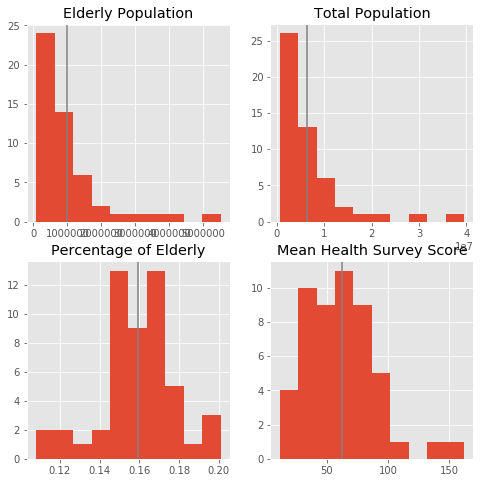

In [31]:
census_columns= census_df.select_dtypes(include=['float64'])
distributions((2,2), (8,8), census_df, census_columns)

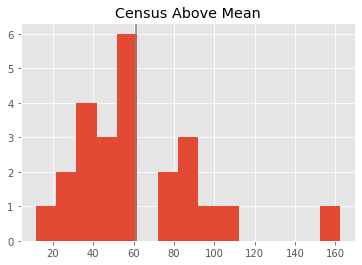

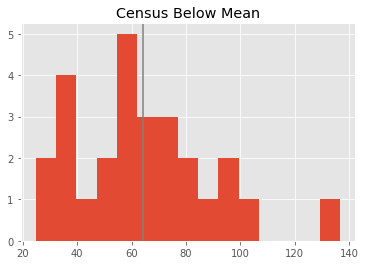

In [32]:
fig, ax = plt.subplots()
ax.set_title('Census Above Mean')
ax.hist(census_above_mean['Mean Health Survey Score'], bins=15)
ax.axvline(np.mean(census_above_mean['Mean Health Survey Score']), color='grey')

fig, ax = plt.subplots()
ax.set_title('Census Below Mean')
ax.hist(census_below_mean['Mean Health Survey Score'], bins=15)
ax.axvline(np.mean(census_below_mean['Mean Health Survey Score']), color='grey')

In [33]:
print(np.mean(census_below_mean['Mean Health Survey Score']))
print(np.mean(census_above_mean['Mean Health Survey Score']))

63.995120191938106
61.17622809956935


In [34]:
p_value = stats.mannwhitneyu(census_above_mean['Mean Health Survey Score'], 
                             census_below_mean['Mean Health Survey Score'], alternative='greater')
print('p_value for Population of Elderly per State vs Mean Health Survey Score= {}'.format(p_value[1]))

p_value for Population of Elderly per State vs Mean Health Survey Score= 0.6981057894410738


In [35]:
Conclusion: 'I fail to reject my null hypothesis'

### Avg Number of Residents Per Day vs Mean Health Score

In [36]:
avg_residents = df_import[['Provider Name', 'Provider State', 'Average Number of Residents Per Day', 'Total Weighted Health Survey Score']].dropna()
avg_residents_mean = np.mean(avg_residents['Average Number of Residents Per Day'])
avg_residents['Mean Health Survey Score']= avg_residents['Provider State'].map(nursing_group)

residents_above_mean = avg_residents[avg_residents['Average Number of Residents Per Day']>= avg_residents_mean]

residents_below_mean = avg_residents[avg_residents['Average Number of Residents Per Day']< avg_residents_mean]




In [37]:
residents_above_mean.head()

,Provider Name,Provider State,Average Number of Residents Per Day,Total Weighted Health Survey Score,Mean Health Survey Score
0,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,AL,98.5,291.667,31.786894
1,SUMMERFORD NURSING HOME INC,AL,200.0,72.167,31.786894
3,HENDRIX HEALTH AND REHABILITATION,AL,104.5,18.667,31.786894
4,"LINEVILLE HEALTH AND REHABILITATION, LLC",AL,99.0,14.000,31.786894
5,ALBERTVILLE NURSING HOME,AL,152.4,14.000,31.786894


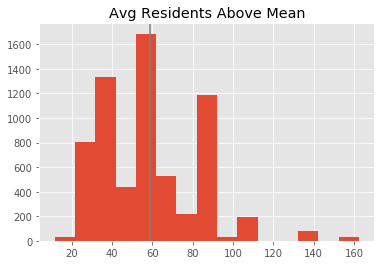

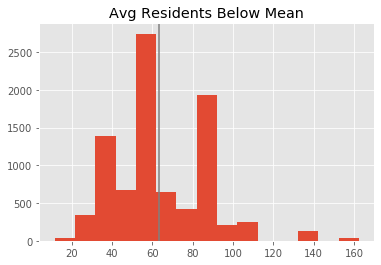

In [38]:
fig, ax = plt.subplots()
ax.set_title('Avg Residents Above Mean')
ax.hist(residents_above_mean['Mean Health Survey Score'], bins=15)
ax.axvline(np.mean(residents_above_mean['Mean Health Survey Score']), color='grey')

fig, ax = plt.subplots()
ax.set_title('Avg Residents Below Mean')
ax.hist(residents_below_mean['Mean Health Survey Score'], bins=15)
ax.axvline(np.mean(residents_below_mean['Mean Health Survey Score']), color='grey')

In [39]:
p_value = stats.mannwhitneyu(residents_above_mean['Mean Health Survey Score'], 
                             residents_below_mean['Mean Health Survey Score'], alternative='greater')
p_value

MannwhitneyuResult(statistic=25375453.5, pvalue=1.0)

In [40]:
state_gdp = pd.read_csv('state_gdp.csv').dropna()
# state_gdp.mean = np.mean(state_gdp['2019 Q1'])

state_gdp.head()

,State,2018 Q1,2018 Q2,2018 Q3,2018 Q4,2019 Q1
0,Connecticut,270268,269863,276934,279653,282002
1,Maine,63173,64082,64798,65349,66022
2,Massachusetts,558137,565224,570024,575635,581718
3,New Hampshire,83566,84035,85201,86046,87009
4,Rhode Island,60503,61432,60807,61341,61928


### Mean State GDP vs Mean Health Survey Score

In [45]:
state_gdp['2019 Q1'] = pd.to_numeric(state_gdp['2019 Q1'])

state_gdp['State'] = state_gdp['State'].apply(lambda x: us_state_abbrev[x])

state_gdp_mean = np.mean(state_gdp['2019 Q1'])

nursing_group = dict(merged_df.groupby('Provider State').mean()['Total Weighted Health Survey Score'])


state_gdp['Mean Health Survey Score']= state_gdp['State'].map(nursing_group)
state_gdp.sort_values(by=['2019 Q1'])


,State,2018 Q1,2018 Q2,2018 Q3,2018 Q4,2019 Q1,Mean Health Survey Score
5,VT,33193,33760,33794,34154,34515,58.268556
44,WY,38496,39230,39860,39899,39428,58.530711
42,MT,48070,48902,49274,49635,50038,78.111808
23,SD,50558,51305,51918,52544,53075,43.430462
45,AK,52832,53732,54630,54851,54585,96.046278
22,ND,52982,54756,55462,55657,55604,34.008238
4,RI,60503,61432,60807,61341,61928,23.026778
1,ME,63173,64082,64798,65349,66022,24.992883
6,DE,73168,74104,76084,76537,77084,83.428239
35,WV,74784,76833,79123,79168,79482,85.524202


In [46]:
gdp_above_mean = state_gdp[state_gdp['2019 Q1']>= state_gdp_mean]

gdp_below_mean = state_gdp[state_gdp['2019 Q1']< state_gdp_mean]

gdp_below_mean

,State,2018 Q1,2018 Q2,2018 Q3,2018 Q4,2019 Q1,Mean Health Survey Score
0,CT,270268,269863,276934,279653,282002,45.458130
1,ME,63173,64082,64798,65349,66022,24.992883
3,NH,83566,84035,85201,86046,87009,11.478405
4,RI,60503,61432,60807,61341,61928,23.026778
5,VT,33193,33760,33794,34154,34515,58.268556
6,DE,73168,74104,76084,76537,77084,83.428239
7,DC,137894,138995,141729,142502,144051,101.286889
13,IN,361722,365166,368311,371629,374664,55.708125
16,WI,331217,335519,338680,342470,345390,50.916672
17,IA,185992,190851,191150,192608,193726,35.957597


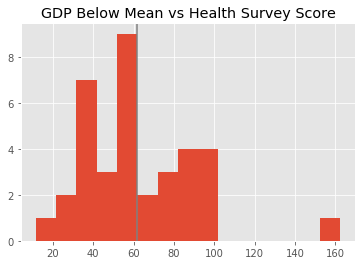

In [47]:

ax.set_title('GDP Above Mean vs Health Survey Score')
ax.hist(gdp_above_mean['Mean Health Survey Score'], bins=15)
ax.axvline(np.mean(gdp_above_mean['Mean Health Survey Score']), color='grey')

fig, ax = plt.subplots()
ax.set_title('GDP Below Mean vs Health Survey Score')
ax.hist(gdp_below_mean['Mean Health Survey Score'], bins=15)
ax.axvline(np.mean(gdp_below_mean['Mean Health Survey Score']), color='grey')

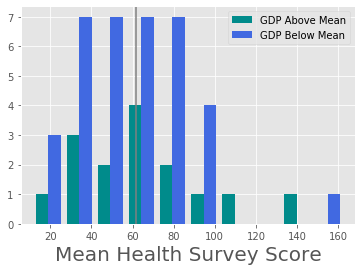

In [48]:
fig, ax = plt.subplots()
ax.hist([gdp_above_mean['Mean Health Survey Score'], 
         gdp_below_mean['Mean Health Survey Score']], 
        label=['GDP Above Mean', 'GDP Below Mean'], 
       color = ['darkcyan', 'royalblue'])
ax.legend(loc='upper right')
ax.set_xlabel('Mean Health Survey Score',fontsize=20)
ax.axvline(np.mean(gdp_below_mean['Mean Health Survey Score']), color='grey');

In [49]:
p_value = stats.mannwhitneyu(gdp_above_mean['Mean Health Survey Score'], 
                             gdp_below_mean['Mean Health Survey Score'], alternative='less')
p_value

MannwhitneyuResult(statistic=287.0, pvalue=0.6412372874774771)

In [50]:
h0 = 'Poorer states scores are better than wealthy states'
h1 = 'Wealthy states scores are better than poorer states'

In [51]:
non profit vs for profit

SyntaxError: invalid syntax (<ipython-input-51-411934f232fe>, line 1)

In [52]:
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [53]:
init_notebook_mode(connected=True) 
import pandas as pd

In [54]:
above_mean_states = list(gdp_above_mean['State'])
x = len(above_mean_states)
color_lst = []
for i in range(1, x+1):
    color_lst.append(i)

In [55]:
data = dict(type = 'choropleth',
            locations = above_mean_states,
            locationmode = 'USA-states',
            colorscale= 'Portland',
            z=color_lst,)

In [56]:
layout = dict(geo = {'scope':'usa'})

In [57]:
choromap = go.Figure(data = [data],layout = layout)
choromap.update_layout(
    title_text='US States with GDP Above the Mean')
iplot(choromap)

### Sorted States vs Mean Health

In [58]:
#state_gdp['State'] = state_gdp['State'].apply(lambda x: us_state_abbrev[x])
nursing_group = dict(merged_df.groupby('Provider State').mean()['Total Weighted Health Survey Score'])


state_gdp['Mean Health Survey Score']= state_gdp['State'].map(nursing_group)
sorted_gdp = state_gdp.sort_values(by=['2019 Q1'])
sorted_gdp.reset_index()

lowest_gdp = sorted_gdp[0:25]
highest_gdp = sorted_gdp[25:]


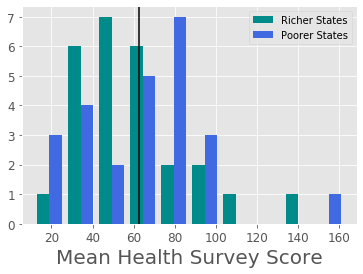

In [59]:
fig, ax = plt.subplots()
ax.hist([highest_gdp['Mean Health Survey Score'], 
         lowest_gdp['Mean Health Survey Score']], 
        label=['Richer States', 'Poorer States'], 
       color = ['darkcyan', 'royalblue'])
ax.legend(loc='upper right')
ax.set_xlabel('Mean Health Survey Score',fontsize=20)
ax.axvline(np.mean(sorted_gdp['Mean Health Survey Score']), color='black')
ax.tick_params(labelsize=12)
fig.savefig('../slides/sorted_distribution.png')


In [60]:
h0 = 'Poorer states scores are better than wealthy states'
h1 = 'Wealthy states scores are better than poorer states'

In [61]:
p_value = stats.mannwhitneyu(highest_gdp['Mean Health Survey Score'], 
                             lowest_gdp['Mean Health Survey Score'], alternative='less')
p_value

MannwhitneyuResult(statistic=287.0, pvalue=0.239912648077595)

In [62]:
Conclusion = 'I fail to reject my null hypothesis'

In [63]:
rich_states = list(highest_gdp['State'])
x = len(rich_states)
color_lst = []
for i in range(1, x+1):
    color_lst.append(i)
    
    
data = dict(type = 'choropleth',
            locations = rich_states,
            locationmode = 'USA-states',
            colorscale= 'Portland',
            z=color_lst,)

layout = dict(geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)
choromap.update_layout(
    title_text='States with Higher GDPs')
iplot(choromap)

$\alpha$

In [102]:
stupid = df_import[df_import['Total Weighted Health Survey Score']<1000]
stupid2= stupid['Total Weighted Health Survey Score'].dropna()


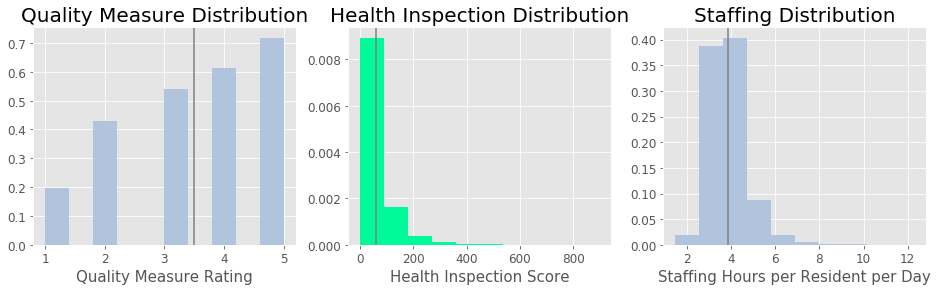

In [105]:
fig, ax = plt.subplots(1,3, figsize=(16,4))
stupid = df_import[df_import['Total Weighted Health Survey Score']<1000].dtypes

ax[0].set_title('Quality Measure Distribution', fontsize=20)
ax[0].hist(df_import['QM Rating'], density=True, color='lightsteelblue')
ax[0].set_xlabel('Quality Measure Rating',fontsize=15)
ax[0].axvline(np.mean(df_import['QM Rating']), color='grey')
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].tick_params(axis='both', which='minor', labelsize=12)

ax[1].set_title('Health Inspection Distribution', fontsize=20)
ax[1].hist(stupid2, density=True, color='mediumspringgreen')
ax[1].set_xlabel('Health Inspection Score', fontsize=15)
ax[1].axvline(np.mean(health), color='grey')
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='minor', labelsize=12)

ax[2].set_title('Staffing Distribution', fontsize=20)
ax[2].hist(df_import['Adjusted Total Nurse Staffing Hours per Resident per Day'], color='lightsteelblue', density=True)
ax[2].set_xlabel('Staffing Hours per Resident per Day', fontsize=15)
ax[2].axvline(np.mean(df_import['Adjusted Total Nurse Staffing Hours per Resident per Day']), color='grey')
ax[2].tick_params(axis='both', which='major', labelsize=12)
ax[2].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('images/rating_distributions.png')

In [86]:
health.sort_values()
census_above_mean = census_df[census_df['Percentage of Elderly']>=mean]

9249        0.000
6548        0.000
11563       0.000
15270       0.000
13122       0.000
5890        0.000
13316       0.000
9873        0.000
6494        0.000
708         0.000
400         0.000
3426        0.000
11316       0.000
12523       0.000
2322        0.000
9259        0.000
7277        0.000
1619        0.000
12079       0.000
10298       0.000
8844        0.000
8593        0.000
10054       0.000
9835        0.000
8901        0.000
9827        0.000
5402        0.000
10258       0.000
3310        0.000
3399        0.000
           ...   
921       543.500
963       544.000
14766     545.667
3551      553.000
11850     554.667
8836      563.500
11279     564.500
13378     578.667
13009     579.000
12068     601.000
14310     601.833
15428     609.833
9929      619.500
11665     630.500
14126     643.000
3970      676.000
6783      694.500
3524      710.667
939       714.667
12327     723.667
14964     741.500
6129      760.000
12456     777.333
11504     818.333
11230     